In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn #machinelearning

In [46]:
#carrgando o dataset
from sklearn.datasets import load_boston

In [47]:
boston = load_boston()

In [48]:
type(boston)

sklearn.utils.Bunch

In [49]:
#verficando as dimensões: 506 linhas(AMOSTRAS) e 13 colunas
boston.data.shape

(506, 13)

In [50]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [51]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [52]:
#convertendo o dataset para um dataframe pandas
df = pd.DataFrame(boston.data)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
#alterando o nome das colunas]
df.columns = boston.feature_names

In [55]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
df['PRICE'] = boston.target

In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
#importando o módulo de regressão linear
from sklearn.linear_model import LinearRegression

In [61]:
#y = preço das casas
#x = variaveis explanatórias
x = df.drop('PRICE', axis=1) #excluindo a variavel target (price) do dataframe
y = df.PRICE #pegando só o target

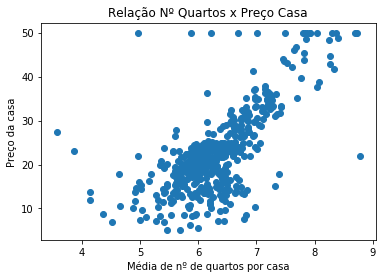

In [62]:
plt.scatter(df.RM, y) #df.RM Número de Quartos # y Preço da Casa
plt.xlabel('Média de nº de quartos por casa')
plt.ylabel('Preço da casa')
plt.title('Relação Nº Quartos x Preço Casa')
plt.show()

In [63]:
regr = LinearRegression()

In [64]:
type(regr)

sklearn.linear_model.base.LinearRegression

In [65]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print('Coeficientes:', regr.intercept_)
print('Número de coeficientes:', len(regr.coef_))

Coeficientes: 36.491103280363404
Número de coeficientes: 13


In [69]:
regr.predict(x)

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138,
       13.3791645 , 15.46258829, 14.69863607, 19.54518512, 20.87309945,
       11.44806825, 18.05900412,  8.78841666, 14.27882319, 13.69097132,
       23.81755469, 22.34216285, 23.11123204, 22.91494157, 31.35826216,
       34.21485385, 28.0207132 , 25.20646572, 24.61192851, 22.94438953,
       22.10150945, 20.42467417, 18.03614022,  9.10176198, 17.20856571,
       21.28259372, 23.97621248, 27.65853521, 24.0521088 , 15.35989132,
       31.14817003, 24.85878746, 33.11017111, 21.77458036, 21.08526739,
       17.87203538, 18.50881381, 23.9879809 , 22.54944098, 23.37068403,
       30.36557584, 25.53407332, 21.11758504, 17.42468223, 20.78

In [71]:
#separando os dados para treino e teste
from sklearn.model_selection import train_test_split

In [72]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, df.PRICE, test_size=0.30, random_state=5)

In [75]:
regr = LinearRegression()

In [76]:
regr.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
pred_treino = regr.predict(x_treino)
pred_teste = regr.predict(x_teste)

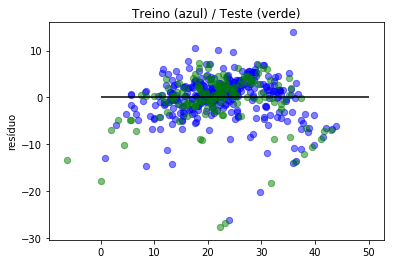

In [83]:
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c='b',s=40, alpha=0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c='g',s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('resíduo')
plt.title('Treino (azul) / Teste (verde)')
plt.show()